In [12]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

result_path= "C:\\Users\\chiaw\\Documents\\data\\CreditCardFraud\\output\\"

In [2]:
result = pd.read_csv(result_path + "CCFraudResult.csv")

result.head(n = 10)

,TrueLabel,Predicted,Score
0,0,0,0.397149
1,0,0,0.193918
2,0,0,0.210354
3,0,0,0.323544
4,0,0,1.014094
5,0,0,0.513898
6,0,0,0.213368
7,0,0,0.308351
8,0,0,1.054949
9,0,0,0.320830


# Plot the labels distribution


0    5523
1      38
Name: TrueLabel, dtype: int64

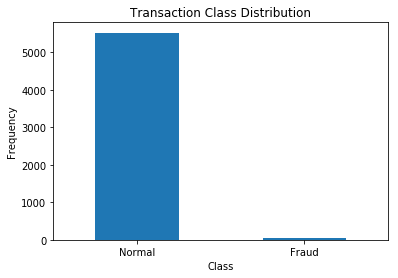

In [3]:
labels_dist = pd.value_counts(result["TrueLabel"], sort = True)


labels_dist.plot(kind = 'bar', rot = 0)
plt.title('Transaction Class Distribution')
plt.xticks(range(2), ["Normal", "Fraud"])
plt.xlabel('Class')
plt.ylabel('Frequency')


labels_dist


# Plot the reconstruction error 

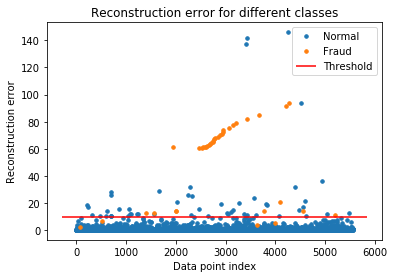

In [10]:
threshold = 10.0

groups = result.groupby('TrueLabel')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Score, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
   
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')


ax.legend()

plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();


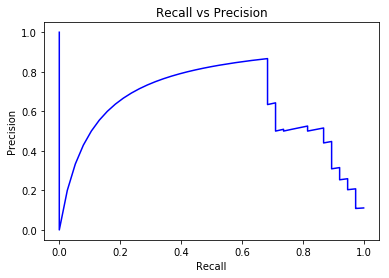

In [25]:
precision, recall, th = precision_recall_curve(result.TrueLabel, result.Score)

plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Precision 

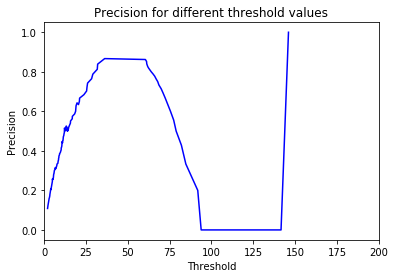

In [26]:

plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.xlim(0, 200)
plt.show()

In [17]:
# Recall

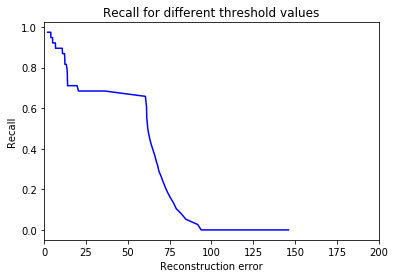

In [27]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.xlim(0, 200)
plt.show()